# 빅데이터분석 12 


# 1. 텍스트 프로세싱 개념
- 의미 : 비정형 텍스트를 자동으로 분석해서 필요한 정보, 지식을 얻는 것

## 텍스트 프로세싱 분류
- statistical analysis : 단어(의미있는 단위) 빈도, 출현 수 등을 분석
- text classification : 정해진 topic category, sentiment(감성) 등으로 분류
- text extraction : 원하는 정보 (주제, 키워드, 고유명사) 추출 

## 통계적 분석
- 단어 빈도 : 가장 많이 나오는 단어나 표현은 무엇인가? (예: 누가 더 많이 언급되는가?)
- collocation : 어떤 단어들이 같이 많이 나오는가 ( 예: 연관 검색어.. )

    
## 텍스트 분류
- topic analysis : 몇 개의 분류로 나누기, 무엇에 관한 것인가? 예) 온라인 쇼핑몰 리뷰 -> 가격, 품질, 배송, 친절 등
- sentiment analysis : 특정 상품, 사람, 주제에 대한 긍정/부정/중립 등 감성 분석
- intent detection : 의도 분석 ( 구매 의향, 정보 요청, ... )
    - 예) email response classifier : Interested, Not Interested, Unsubscribe, Autoresponder, Email Bounce, and Wrong Person
- language classification : 언어 자동 인식 

## 텍스트 추출
- 키워드 추출 : 대표 키워드 몇 개 선정
- 개체명 (고유명사) 인식 : 사람이름, 상표, 회사이름 등 인식 

# 2. 영어 텍스트 분석

## 영어 텍스트 분석 과정

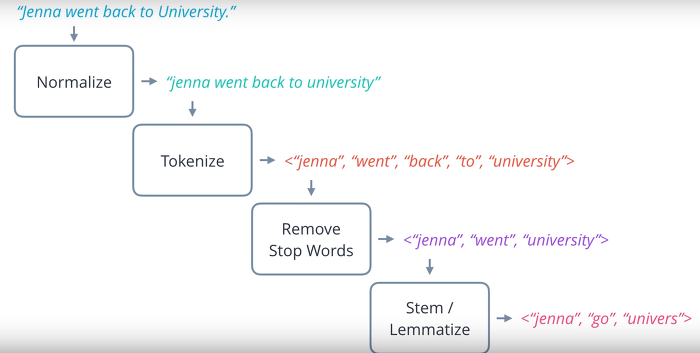


## 라이브러리 및 리소스 설치
- 최초 1회만 실행

In [16]:
#word cloud 시각화
!pip install wordcloud
!pip install xlrd

import nltk   # natural language tool kit

nltk.download('stopwords')  #  stopword 목록
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siyeonson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/siyeonson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/siyeonson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/siyeonson/nltk_data...


True

## 2.1  데이터 준비

## 파일 병합

- glob.glob() : *, ! , 경로 반영 파일 이름 만들기
- pd.read_excel() : 엑셀 파일 읽기

In [2]:
import glob

all_files = glob.glob('*.xls')

all_files 

['myCabinetExcelData (4).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (1).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData.xls',
 'myCabinetExcelData (7).xls']

In [5]:
import pandas as pd

all_files_data = [] # 저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,NaN,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,NaN,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,Big Data and Privacy: Why Public Organizations...,"Prince, Christopher",University of Toronto Press; 1998,2017
4,NaN,5,Big data on individuals in the architectural d...,"Meekings, Scott; Schnabel, Marc Aurel",Taylor & Francis,2017
...,...,...,...,...,...,...
95,NaN,96,Big data analytics sentiment: US-China reactio...,"LaBrie, Ryan C.; Steinke, Gerhard H.; Li, Xian...","Elsevier Science B.V., Amsterdam.",2018
96,NaN,97,Big Data In the first of three articles on Big...,unknown,FENMAN LTD,2014
97,NaN,98,Big data driven lithium-ion battery modeling m...,"Li, Shuangqi; He, Hongwen; Li, Jianwei","Elsevier Science B.V., Amsterdam.",2019
98,NaN,99,Big data in multiple sclerosis: development of...,unknown,The Society,2015


In [6]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat 

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,NaN,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,NaN,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,Big Data and Privacy: Why Public Organizations...,"Prince, Christopher",University of Toronto Press; 1998,2017
4,NaN,5,Big data on individuals in the architectural d...,"Meekings, Scott; Schnabel, Marc Aurel",Taylor & Francis,2017
...,...,...,...,...,...,...
995,NaN,96,Efficient data management tools for the hetero...,"Alekseev, A. A.; Osipova, V. V.; Ivanov, M. A....",Springer Science + Business Media,2016
996,NaN,97,Securing Big Data Provenance for Auditors: The...,"Appelbaum, Deniz",Strategic and Emerging Technologies Section of...,2016
997,NaN,98,Demystifying big data: Anatomy of big data dev...,"Shin, Dong-Hee","Elsevier Science B.V., Amsterdam.",2016
998,NaN,99,Assessing Whether “Big Data” Solutions Provide...,"Hertz, D.; Gavaghan, M.; Garfield, S.","Elsevier Science B.V., Amsterdam",2014


## 데이터 전처리 (Pre-processing)

In [7]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title.head()

0                    Big data promises big opportunity
1    Big data vs accurate data in health research: ...
2    Data stream classification and big data analytics
3    Big Data and Privacy: Why Public Organizations...
4    Big data on individuals in the architectural d...
Name: 제목, dtype: object

- text처리 : stopword, tokenizer, stemmizer

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

- 처리 
- 결과 모으기

In [17]:
import re

words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) # 영문자만 남기기 
    #if re.match(r"[^a-zA-Z]+",  str(title)):
    #        print (title, "=>", EnWords)
    EnWordsToken = word_tokenize(EnWords.lower()) # (소문자화후) 토큰 나누기 
    #print(EnWordsToken)
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # stopword
    #print(EnWordsTokenStop)
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # lemmatize
    #print(EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)
    
    #break # 1개만 실행

In [18]:
print(words[:10])  

[['big', 'data', 'promise', 'big', 'opportunity'], ['big', 'data', 'v', 'accurate', 'data', 'health', 'research', 'large', 'scale', 'physical', 'activity', 'monitoring', 'smartphones', 'wearable', 'device', 'risk', 'unconscious', 'bias'], ['data', 'stream', 'classification', 'big', 'data', 'analytics'], ['big', 'data', 'privacy', 'public', 'organization', 'adopt', 'big', 'data'], ['big', 'data', 'individual', 'architectural', 'design', 'process', 'combining', 'individual', 'data', 'architect', 'toolset'], ['big', 'data', 'operation', 'basis', 'benchmarking', 'data', 'grid'], ['big', 'data', 'benchmark', 'big', 'd'], ['big', 'data', 'ownership', 'data', 'recent', 'development', 'europe'], ['big', 'survey', 'big', 'data', 'centre'], ['big', 'data', 'approach', 'trauma', 'outcome', 'prediction', 'autonomous', 'resuscitation', 'shiming', 'yang', 'mary', 'njoku', 'colin', 'f', 'mackenzie', 'discus', 'massive', 'clinical', 'data', 'used', 'learning', 'prediction', 'model', 'level', 'trauma',

- 여러 list 합치기 :  list(reduce(lambda x, y: x+y, list_of_list))

In [19]:
from functools import reduce
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  

['big', 'data', 'promise', 'big', 'opportunity', 'big', 'data', 'v', 'accurate', 'data', 'health', 'research', 'large', 'scale', 'physical', 'activity', 'monitoring', 'smartphones', 'wearable', 'device', 'risk', 'unconscious', 'bias', 'data', 'stream', 'classification', 'big', 'data', 'analytics', 'big', 'data', 'privacy', 'public', 'organization', 'adopt', 'big', 'data', 'big', 'data', 'individual', 'architectural', 'design', 'process', 'combining', 'individual', 'data', 'architect', 'toolset', 'big', 'data', 'operation', 'basis', 'benchmarking', 'data', 'grid', 'big', 'data', 'benchmark', 'big', 'd', 'big', 'data', 'ownership', 'data', 'recent', 'development', 'europe', 'big', 'survey', 'big', 'data', 'centre', 'big', 'data', 'approach', 'trauma', 'outcome', 'prediction', 'autonomous', 'resuscitation', 'shiming', 'yang', 'mary', 'njoku', 'colin', 'f', 'mackenzie', 'discus', 'massive', 'clinical', 'data', 'used', 'learning', 'prediction', 'model', 'level', 'trauma', 'centre', 'support

## 2.2 데이터 탐색

## 단어 빈도 탐색

- Counter ( 리스트 ) : count dictionary 생성

In [20]:
from collections import Counter

count = Counter(words2)

count   #출력하여 내용 확인

Counter({'big': 1354,
         'data': 1645,
         'promise': 13,
         'opportunity': 31,
         'v': 3,
         'accurate': 3,
         'health': 37,
         'research': 38,
         'large': 18,
         'scale': 12,
         'physical': 3,
         'activity': 2,
         'monitoring': 7,
         'smartphones': 1,
         'wearable': 2,
         'device': 10,
         'risk': 12,
         'unconscious': 1,
         'bias': 3,
         'stream': 8,
         'classification': 8,
         'analytics': 137,
         'privacy': 17,
         'public': 11,
         'organization': 3,
         'adopt': 1,
         'individual': 6,
         'architectural': 1,
         'design': 14,
         'process': 19,
         'combining': 3,
         'architect': 1,
         'toolset': 1,
         'operation': 6,
         'basis': 1,
         'benchmarking': 2,
         'grid': 3,
         'benchmark': 2,
         'd': 1,
         'ownership': 1,
         'recent': 4,
         'development

- 빈출 단어 뽑기 
- count.most_common(n) : 결과를 tuple로 

In [21]:
word_count = {}

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))


data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
science : 50
system : 50
management : 48
challenge : 47
approach : 44
mining : 40
research : 38
new : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
information : 26
framework : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
deal : 23
network : 23
quality : 23
knowledge : 22
review : 22
use : 22
efficient : 22
era : 22
storage : 21
healthcare : 21
perspective : 21
service : 21
open : 20
process : 19
survey : 19
making : 19
platform : 19
large : 18
decision : 18
business : 18


- 특정 단어 제거

In [22]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 2.3 시각화

## 단어 빈도 히스토그램

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 85

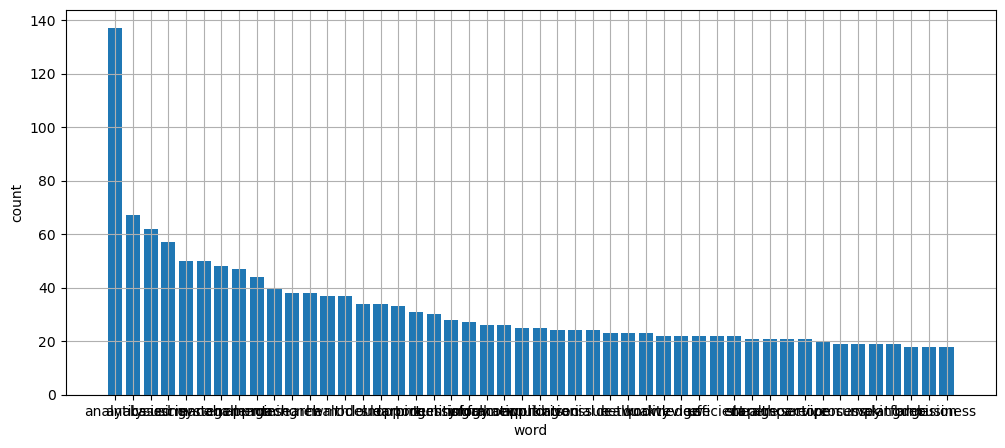

In [23]:
import matplotlib.pyplot as plt

# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

## 워드클라우드

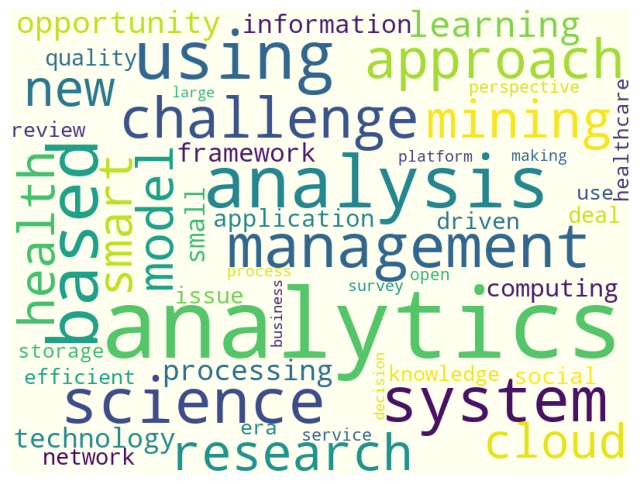

In [24]:
from wordcloud import WordCloud



wc=WordCloud(background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

- 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라짐
- 이미지 저장

In [25]:
cloud.to_file("riss_bigdata_wordCloud.jpg")

### 과제 1 : stopword와 lemmatize 를 적용하지 않은 word cloud를 만들어서 비교하기

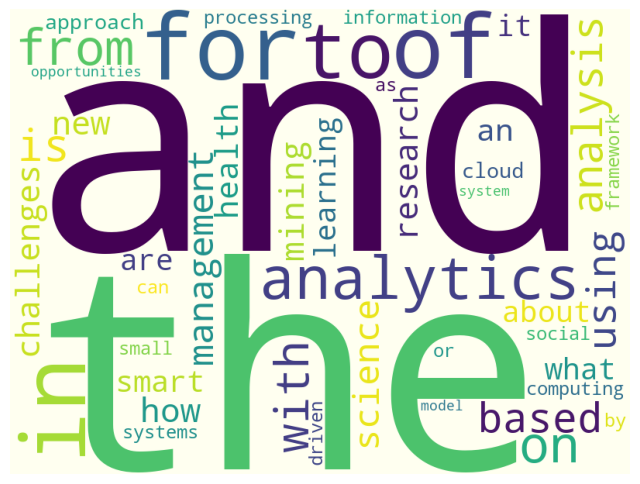

In [40]:
import glob
import pandas as pd
import re
from functools import reduce
from collections import Counter
from wordcloud import WordCloud

# 읽기
all_files = glob.glob('*.xls')
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_title2 = all_files_data_concat['제목']

# 단어 처리
words = []  
for title in all_title2:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) # 영문자만 남기기 
    #if re.match(r"[^a-zA-Z]+",  str(title)):
    #        print (title, "=>", EnWords)
    EnWordsToken = word_tokenize(EnWords.lower()) # (소문자화후) 토큰 나누기 
    #print(EnWordsToken)
    words.append(EnWordsToken)

words3 = list(reduce(lambda x, y: x+y,words))
count2 = Counter(words3)

word_count2 = {}
for tag, counts in count2.most_common(50):
    if(len(str(tag))>1):
        word_count2[tag] = counts
        #print("%s : %d" % (tag, counts))

# 검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count2['big']
del word_count2['data']


# word cloud
wc2 = WordCloud(background_color='ivory', width=800, height=600)
cloud2 = wc2.generate_from_frequencies(word_count2)

plt.figure(figsize=(8,8))
plt.imshow(cloud2)
plt.axis('off')
plt.show()

# 3. 한글 텍스트 분석

## NLP개념

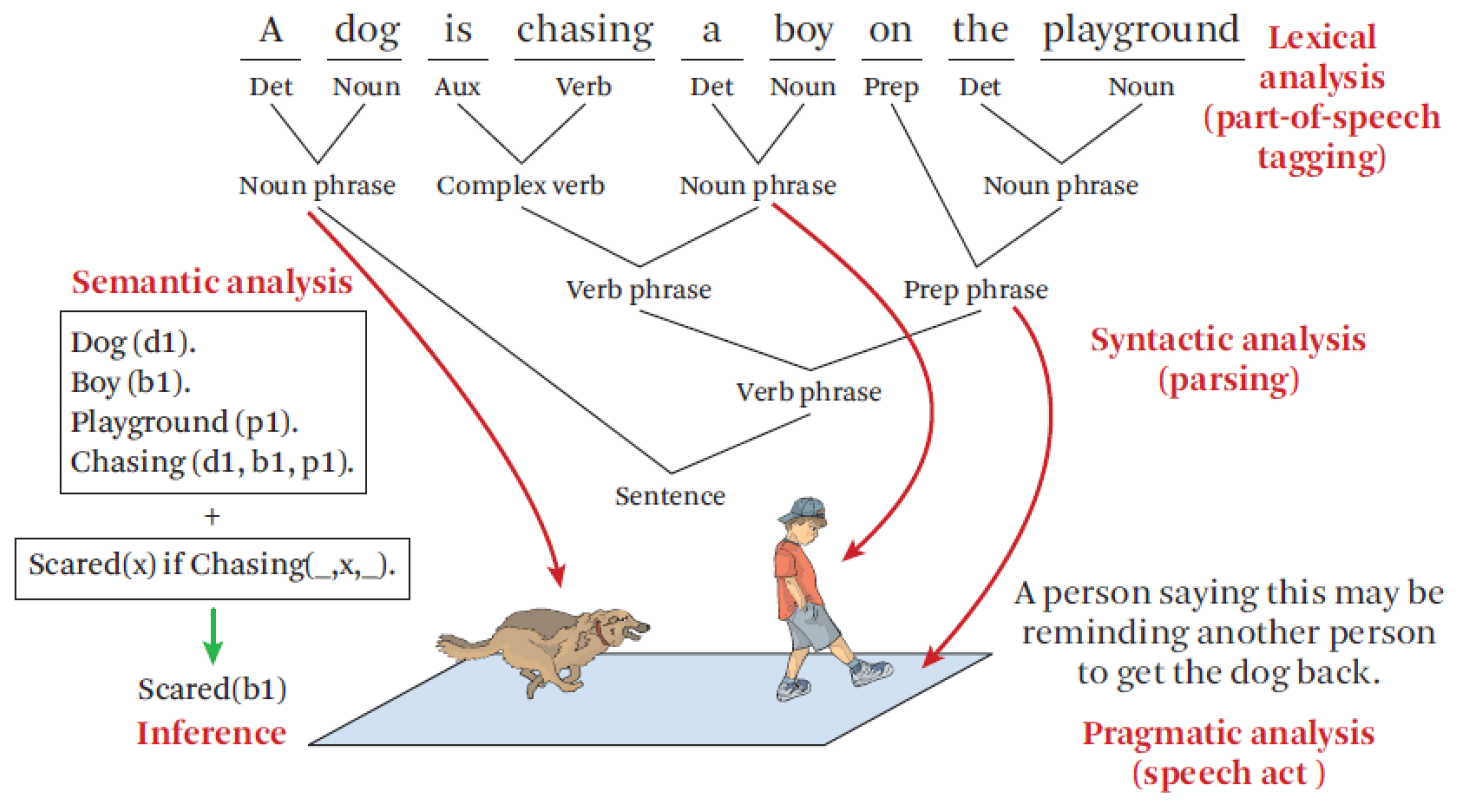

##  한국어 NLP

- 형태소 분석 만 다르다

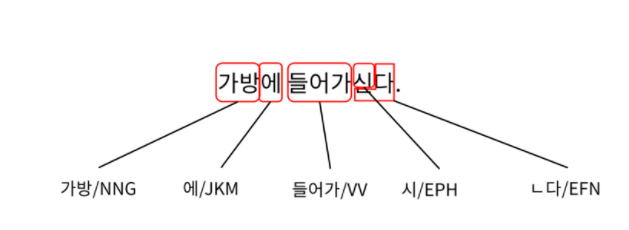



## 한글 처리 라이브러리  설치
- JDK 설치 : 환경에 맞춰서 
    - https://www.oracle.com/java/technologies/downloads/#jdk17-windows
- %JAVA_HOME%  변수 설정 

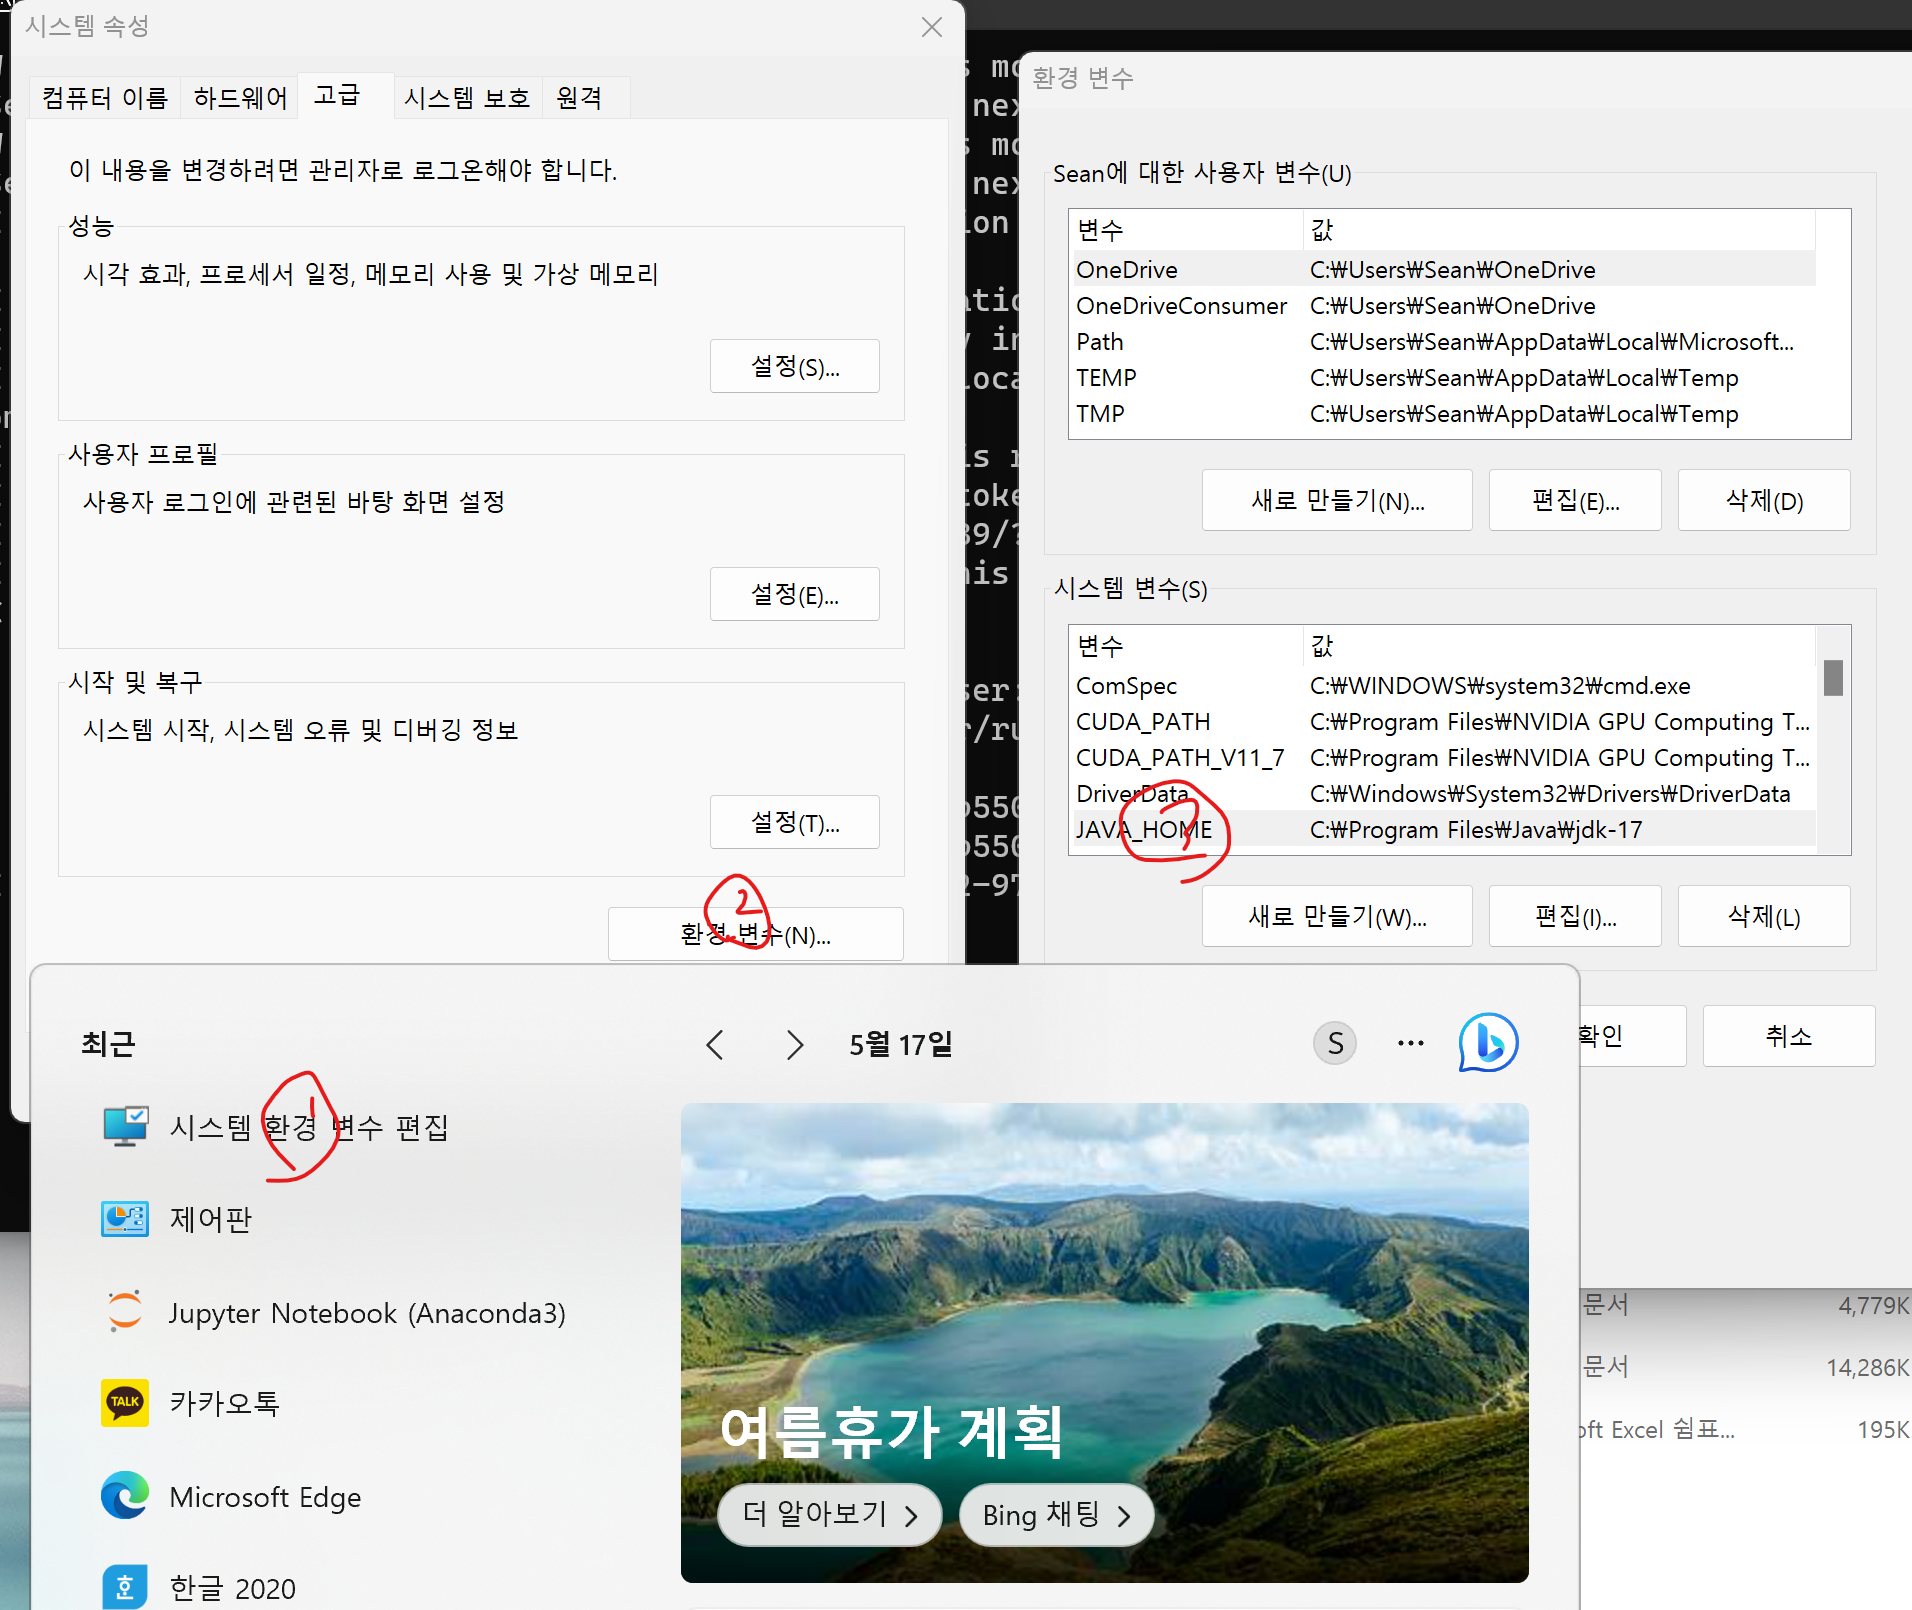

- jupyter notebook 재실행

- jpype1 설치  : java로 만들어진 library 사용
- konlpy 설치  : konlp python wrapper
- Konlpy : https://konlpy.org/ko/latest/

In [1]:
!pip install jpype1
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 300.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 324.3 kB/s eta 0:00:0000:0100:02


In [ ]:
# JDK 설치
from konlpy.tag import Okt

jvm_path = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java"

okt = Okt(jvmpath=jvm_path)

- test 

In [ ]:
from konlpy.tag import Okt
okt=Okt()
print(okt.pos('아버지가 방에 들어가신다'))

In [ ]:
from konlpy.tag import Kkma
kma=Kkma()
print(kma.pos('아버지가 방에 들어가신다'))

- error 발생시,  C:\Users\user\anaconda3\Lib\site-packages\konlpy 의 jvm.py 를 12.zip의 jvm.py로 교체



## 3.1 데이터 준비

- 파일 읽기

In [ ]:
import json
inputFileName = 'etnews.kr_facebook'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data 

- 분석할 데이터 추출

In [ ]:
import re
message = ''

for item in data:
    if 'message' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''   # 문자, 숫자만 남기기
        
message

- nlp.nouns(텍스트) : 명사 추출기

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N  

### 과제 2: 동사를 모두 추출하기 

In [ ]:
verb = []
pos = nlp.pos(message)
for p in pos :
    if p[1] == 'Verb' :
        verb.append(p[0])
verk

## 3.2 데이터 탐색 
- 단어 빈도 탐색

In [ ]:
from collections import Counter
count = Counter(message_N)

count 

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

- 히스토그램

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

- 워드 클라우드

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')